We now use boosting to predict Salary in the Hitters data set.

Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as skm
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from ISLP import load_data

Hitters = load_data("Hitters")

Hitters = Hitters[Hitters["Salary"].notna()]

Hitters["Salary"] = np.log(Hitters["Salary"])

Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.

In [40]:
X = Hitters.drop(["Salary"], axis = 1)
y = Hitters["Salary"]

X["League"] = X["League"].replace({"N":0, "A":1})
X["Division"] = X["Division"].replace({"W":0, "E":1})
X["NewLeague"] = X["NewLeague"].replace({"N":0, "A":1})

(X_train, X_test, y_train, y_test) = skm.train_test_split(X, y, test_size = 0.2395, random_state = 0)

Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.

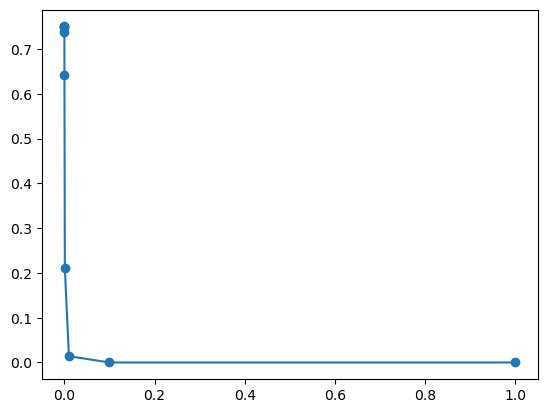

In [50]:
shrinkage_values = [0.00000001,0.0000001,0.000001,0.00001, 0.0001, 0.001, 0.01, 0.1, 1]
mse_scores = []

for shrinkage in shrinkage_values:
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=shrinkage, random_state=42)
    model.fit(X_train, y_train)

    pred = model.predict(X_train)
    mse = mean_squared_error(y_train, pred)
    
    mse_scores.append(mse)

plt.plot(shrinkage_values, mse_scores,marker = "o")

Compare the test MSE of boosting to the test MSE that results
from applying two of the regression approaches seen in
Chapters 3 and 6.

In [61]:
gb_model = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1)
gb_model.fit(X_train, y_train)
pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, pred_gb)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, pred_lasso)

pls_model = PLSRegression(n_components=2)
pls_model.fit(X_train, y_train)
pred_pls = pls_model.predict(X_test)
mse_pls = mean_squared_error(y_test, pred_pls)

print(mse_gb)
print(mse_lasso)
print(mse_pls)

0.177994978793269
0.49303280734678834
0.4027084928037787


Now apply bagging to the training set. What is the test set MSE
for this approach?

In [64]:
rf_model = RandomForestRegressor(n_estimators=1000, random_state=42)
rf_model.fit(X_train, y_train)
pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, pred_rf)

print(mse_rf)

0.14188645882312317
